# Basics of DSP

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Sinusoids

$$ s[n]=A.sin(2\pi\frac{f}{F_{s}}n +\phi)$$

$$ s_1[n] = \frac{e^{(j\omega n)} - e^{(-j\omega n)}}{2j}$$
$$ \omega = \frac{2\pi f}{F_{s}} $$

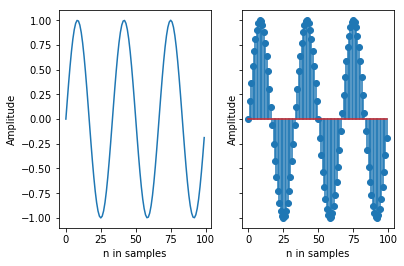

In [14]:
Fs = 100
n = np.arange(Fs*1)
alpha = 0.05
phi = 0
F = 3.
s = np.sin(2. * np.pi * F * n / Fs + phi) #* np.exp(-alpha * n)
omega = 2. * np.pi * F/ Fs
s1 = (np.exp(omega*n*1j) - np.exp(-omega*n*1j) ) / 2j
f, a = plt.subplots(1, 2, sharey=True, sharex=True)
a[0].plot(n,s)
a[0].set_xlabel("n in samples")
a[0].set_ylabel("Amplitude")
a[1].stem(n,s1.real)
a[1].set_xlabel("n in samples")
a[1].set_ylabel("Amplitude")

# Features

$$ E = \sum_k |x[k]|^2 $$
$$ E = X.X^T $$

In [16]:
energy = np.dot(s, s)
print(energy)
rms = np.sqrt(energy/len(s))
print(rms)

50.0
0.707106781187


# FFT

$$ s_2[n]=0.7 \times sin(2\pi\frac{2.0}{F_{s}}n) + 0.3 \times sin(2\pi\frac{10.0}{F_{s}}n) $$

In [19]:
s2 = 0.7 * np.sin(2. * np.pi * 2. * n / Fs)\
+ 0.3 * np.sin(2. * np.pi * 10. * n / Fs)\
# + 0.5 * np.random.normal(0.9)

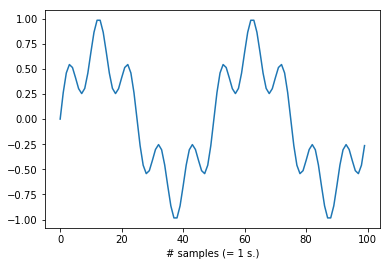

In [20]:
plt.plot(n, s2)
plt.xlabel("# samples (= 1 s.)")

$$ X[k]=\sum_{n=0}^{N-1}x[n]e^{-j\frac{2\pi kn}{N}}\text{ with }k=0,1,...,N-1 $$

length s2: 100
length fft: 100
length rfft: 51


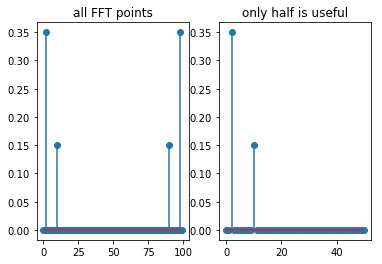

In [18]:
# by default fft is size of signal
print("length s2:", len(s2))
fig, ax = plt.subplots(1,2)
f = np.fft.fft(s2)
print("length fft:", len(f))
ax[0].stem(abs(f/len(f)))
ax[0].title.set_text("all FFT points")
f_real = np.fft.rfft(s2)
ft = f_real /(len(f))
print("length rfft:", len(ft))
ax[1].stem(abs(ft))
ax[1].title.set_text("only half is useful")

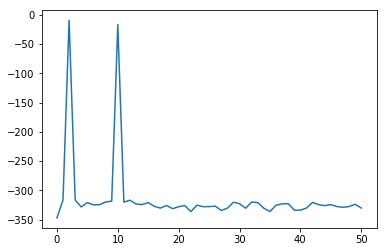

In [23]:
    plt.plot(20*np.log10(abs(ft)))

In [22]:
# amplitude of peaks
ft[abs(ft) > 0.2]
# index of peaks
np.where(abs(ft) > 0.2)

(array([2]),)

#### zero padding

65


<Container object of 3 artists>

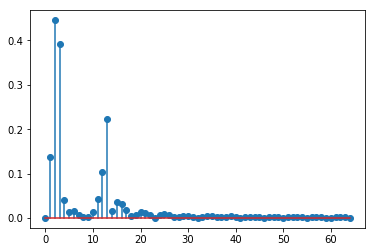

In [24]:
# if n_fft > n_signal np.fft zero pad automatically => better resolution
f = np.fft.rfft(s2, n=128)
ft = f /(len(f))
print(len(f))
plt.stem(abs(ft))

In [25]:
def peak_detection(mX, t):
    """
    Detect spectral peak locations
    mX: magnitude spectrum, t: threshold
    returns ploc: peak locations
    """

    thresh = np.where(mX[1:-1]>t, mX[1:-1], 0);             # locations above threshold
    next_minor = np.where(mX[1:-1]>mX[2:], mX[1:-1], 0)     # locations higher than the next one
    prev_minor = np.where(mX[1:-1]>mX[:-2], mX[1:-1], 0)    # locations higher than the previous one
    ploc = thresh * next_minor * prev_minor                 # locations fulfilling the three criteria
    ploc = ploc.nonzero()[0] + 1                            # add 1 to compensate for previous steps
    return ploc

In [26]:
ploc = peak_detection(ft, 0.1)

In [28]:
print(ploc)

[2]


# FIR

$$ y[n]=\sum_{k=0}^{M-1}h[k]x[n-k] $$

In [29]:
def convolution(x, coef):
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(coef)):
            if (i-j) > 0:
                y[i] += coef[j] * x[i-j]
    return y

In [30]:
a = [0.32590173795979338000, 0.34819652408041324000,0.32590173795979338000]
y = convolution(s2, a)

# original
f = np.fft.rfft(s2)
ft = f /(len(f))

# filtered
fy = np.fft.rfft(y)
fyt = fy /(len(fy))

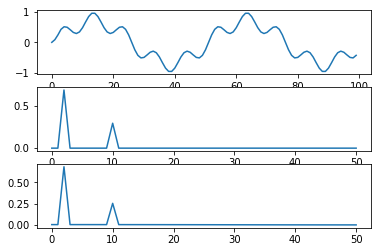

In [31]:
fig, axes = plt.subplots(3, 1)
axes[0].plot(y)
axes[1].plot(abs(ft))
axes[2].plot(abs(fyt))


# Frame-based processing

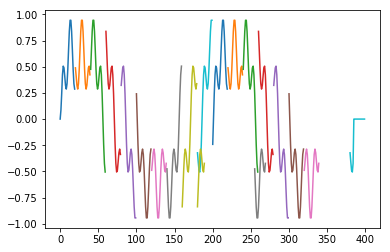

In [37]:
def signal2frames(signal, analysis_window_size, hop_size, padding=True):
    # do zero padding
    n_hops = len(signal) // hop_size
    frames = []
    for i in range(n_hops):
        # note: no error if i * hop_size + analyis_window_size out of len(signal)
        frames.append(signal[(i * hop_size) : (i * hop_size + analysis_window_size)])
    # last frame might not be completely filled with signal => zero pad missing indices
    if padding:
        last_frame = frames[n_hops - 1]
        frames[n_hops -1] = np.pad(last_frame, (0, analysis_window_size - len(last_frame)),'constant')

    return frames

analysis_size = 20
hop_size = 10
frames = signal2frames(y, analysis_size, hop_size)
for idx, f in enumerate(frames):
    plt.plot(np.arange(idx * len(f), idx * len(f) + len(f)), f)

#### Algo for hearing aids
- dynamic range compression
- feedback cancelation
- noise reduction
- beamforming
- adaptive filtering
- frequency domain filtering
- sound classification
- binaural processing
- sample rate conversion

NameError: name 'arange' is not defined